<a href="https://www.kaggle.com/code/dataapari/ipl-team-sr-er-player-analysis?scriptVersionId=101684077" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsf-datasets/student_scores.csv
/kaggle/input/tsf-datasets/matches.csv
/kaggle/input/tsf-datasets/deliveries.csv
/kaggle/input/tsf-datasets/globalterrorismdb_0718dist.csv
/kaggle/input/tsf-datasets/india-news-headlines.csv
/kaggle/input/tsf-datasets/SampleSuperstore.csv
/kaggle/input/tsf-datasets/Iris.csv


# Madhuri

## IPL Analysis (2008 - 2019)

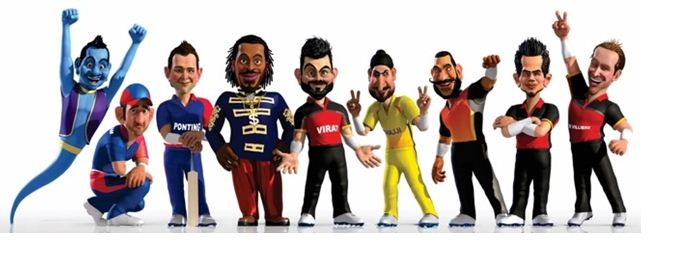

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_del = pd.read_csv('../input/tsf-datasets/deliveries.csv')
df_mat = pd.read_csv('../input/tsf-datasets/matches.csv')

In [4]:
df_del.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df_mat.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df_del.info()
df_del.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## Data Dictionary 

Let us first get acquainted with the columns of **del_mat**: 

**id**: The IPL match id.

**season**: The IPL season

**city**: The city where the IPL match was held.

**date**: The date on which the match was held.

**team1**: One of the teams of the IPL match

**team2**: The other team of the IPL match

**toss_winner**: The team that won the toss

**toss_decision**: The decision taken by the team that won the toss to ‘bat’ or ‘field’

**result**: The result(‘normal’, ‘tie’, ‘no result’) of the match.

**dl_applied**: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.(it is rule to predict the result in case of heavy rain or bad light)

**winner**: The winner of the match.

**win_by_runs**: Provides the runs by which the team batting first won

**win_by_wickets**: Provides the number of wickets by which the team batting second won.

**player_of_match**: The outstanding player of the match.

**venue**: The venue where the match was hosted.

**umpire1**: One of the two on-field umpires who officiate the match.

**umpire2**: One of the two on-field umpires who officiate the match.

**umpire3**: The off-field umpire who officiates the match

The columns of **df_del** :

**match_id** : The unique id of each match

**inning** : An innings in cricket is a part of a match in which a team bats.

**batting_team** : The team which is batting

**bowling_team** : The team which bowled

**over** : Over number

**ball** : ball number 

**batsman** : batsman

**non_striker** : The guy opposite to batsman

**bowler** : The guy who is bowlling

**is_super_over** : This is considered in case oof tie

**wide_runs** : The runs scored by wide balls 

**bye_runs** : The runs scored by bye(when the ball does not touch bat and the batsman body) 

**legbye_runs** : The runs scored by legbye(when the ball does not touch bat but the batsman body) 

**noball_runs** : The runs scored by noball.

**penalty_runs** : The runs scored by penalty balls.

**batsman_runs** : The runs scored by batsman.

**extra_runs** : The extra runs 

**total_runs** : Total run in a ball

**player_dismissed** : If a player was dissmissed

**dismissal_kind** : Reason for dismisssal

**fielder** : fielder who bowled the batsman


In [8]:
df_del.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [9]:
df_mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# From this description we find the following :
1. Total 756 matches were played between 2008 and 2019.
2. On an average matches were won by a margin of 13 runs.
3. On an average matches were won by a margin of 3 wickets.


## **Most Successful team**
1. To find the most successful team we are looking at the ratio of **total matches won** and **total matches played** by each   team.


In [10]:
won_matches = df_mat.groupby('winner').winner.count()
teams = won_matches.index
teams = teams.drop(teams[-3])
won_matches = pd.DataFrame(won_matches)
teams

Index(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals',
       'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab',
       'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'],
      dtype='object', name='winner')

From 2008-2019, total **14 teams** have participated in the IPL. Now we will check the number of matches played and number of matches won for each team.

In [11]:
df_temp = df_mat.groupby(['team1','winner']).winner.count()
total = {}
for i in teams :
    total.update({i : df_mat[(df_mat.team1 == i) |(df_mat.team2 == i) ].id.count()})
    
matches_total = pd.DataFrame.from_dict(total, orient = 'index')

    


In [12]:
win_ratio = pd.DataFrame()
win_ratio = matches_total.join(won_matches)
win_ratio.rename(columns = {0 : 'total_matches', 'winner' : 'won_matches'}, inplace = True)
win_ratio['win_ratios%'] = 100*(win_ratio['won_matches']/win_ratio['total_matches'])
win_ratio['lost_matches'] = win_ratio['total_matches'] - win_ratio['won_matches']
win_ratio = win_ratio.sort_values(by = ['win_ratios%','total_matches'], ascending = False)


In [13]:
def annotate_stacked_bars(ax, pad=0.99, colour="yellow", textsize=10):
    """
        Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),0))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

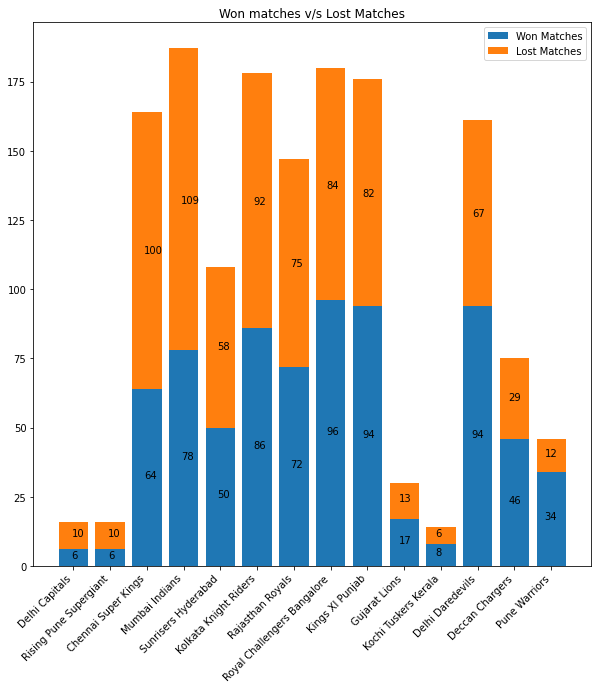

In [14]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
# First plot the lost matches
ax.bar(win_ratio.index, win_ratio['lost_matches'], label='Won Matches')
# Then plot the Won Matches bars on top, starting at the top of the Lost matches
# bars.
ax.bar(win_ratio.index, win_ratio['won_matches'], bottom=win_ratio['lost_matches'],
       label='Lost Matches')
ax.set_title('Won matches v/s Lost Matches')
ax.legend()
plt.xticks(rotation = 45, ha = 'right')
annotate_stacked_bars(ax, pad=0.99, colour="black", textsize=10)


From the above graph, we can see there is **big difference** between number of matches played by each team. 
On one Mumbai Indians have played 187 matches while Delhi Capitals has played only 16 matches. 
A Google search showed that some teams were introduced to play only for one or two seasons and terminated later.

**Gujarat Lions** and **Rising Pune Supergiants** These teams **played in the IPL for two season** between 2016 and 2017 as one of the replacements for Chennai Super Kings and Rajasthan Royals, who were both suspended for two seasons due to illegal betting by their respective owners.

**Pune Warriors and  Kochi Tuskers Kerala** These teams entered in IPL in **2011 seasson**. Kochi Tuskers **left in 2012** due to financial disputes and Pune warrior **left in 2013**.

**Delhi Capitals** This team is **Delhi Daredevils**. It was renamed in Dec 2018 to Delhi Capitals. These are not two different teams. Let us first fix this.

In [15]:
# making Delhi Daredevils and Delhi Capitals one team
win_ratio.loc['Delhi Daredevils','total_matches'] = 177
win_ratio.loc['Delhi Daredevils','won_matches'] = 73
# drop the teams that does not serve any more or duplicates
#win_ratio = win_ratio.drop('Delhi Capitals')
win_ratio = win_ratio.drop(['Pune Warriors','Kochi Tuskers Kerala', 'Gujarat Lions','Rising Pune Supergiant']  )


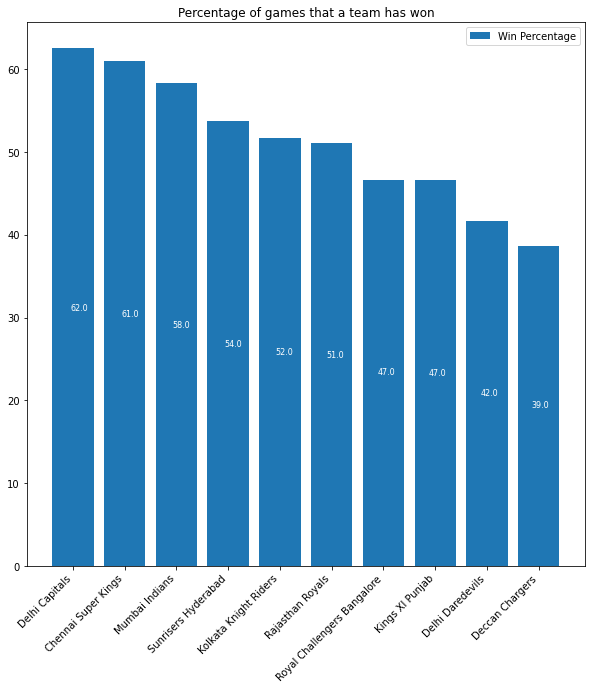

In [16]:
fig1 = plt.figure()
ax1 = plt.axes()
fig1.set_figheight(10)
fig1.set_figwidth(10)
ax1.bar(win_ratio.index, win_ratio['win_ratios%'], width = 0.8, label = 'Win Percentage')
ax1.set_title('Percentage of games that a team has won')
ax1.legend()
plt.xticks(rotation = 45, ha = 'right')
annotate_stacked_bars(ax1, pad=0.99, colour="white", textsize=8)


From the two charts, CSK has won 61% of the matches it has played, which is amazing.
**Chennai SuperKings, Mumbai Indians, Sunrisers Hydrabad** are the three best teams.


## **Finding out the best players**
1. By Strike rate : They are the best batsman who will help in scoring the run. Strike rate is basically the average                         number of runs scoredin 100 balls.

2. By wickets taken : They are the best bowlers who can take the wickets.

3. By Economy rate : They are the best bowlers who will not let runs slip away. Economy rate tells you on an average                          number of runs given in an over.

In [17]:
# A table indicating runs scored by batsman and number of balls thrown by each player
total_runs = df_del.groupby('batsman').total_runs.sum()
total_runs = pd.DataFrame(total_runs)
total_balls = df_del.groupby(['batsman']).match_id.count()
total_balls = pd.DataFrame(total_balls)
Avg_Run = total_runs.join(total_balls)
Avg_Run.rename(columns = {'match_id' : 'Total_balls'}, inplace = True)
Avg_Run['Strike_rate'] = 100*(Avg_Run['total_runs']/Avg_Run['Total_balls'])
Drop_run = Avg_Run[Avg_Run['Total_balls'] < 500]
Drop_run.index
Avg_Run = Avg_Run.drop(Drop_run.index)
Top_players = Avg_Run.sort_values(by= ['Strike_rate','Total_balls'], ascending = False).head(25)
Top_players


,total_runs,Total_balls,Strike_rate
batsman,,,
AD Russell,1527,803,190.161893
RR Pant,1855,1104,168.025362
GJ Maxwell,1485,902,164.634146
HH Pandya,1200,736,163.043478
V Sehwag,2915,1833,159.028914
JC Buttler,1501,954,157.337526
CH Gayle,4873,3131,155.637177
AB de Villiers,4583,2977,153.946926
KH Pandya,960,635,151.181102


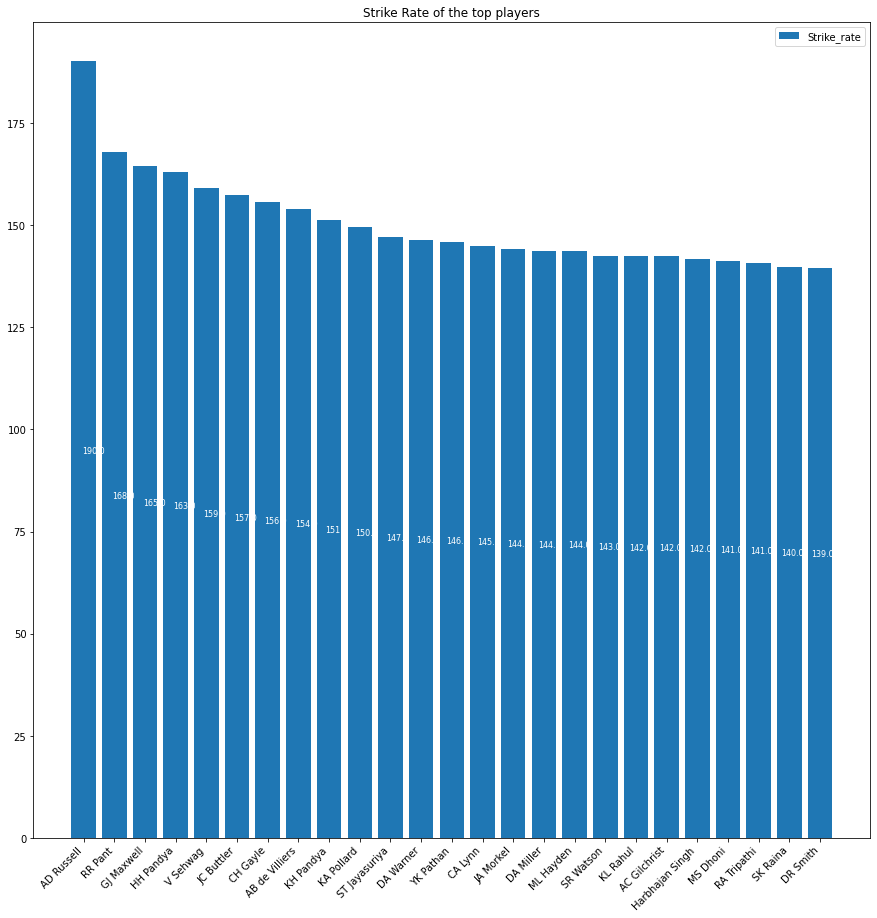

In [18]:
fig1 = plt.figure()
ax1 = plt.axes()
fig1.set_figheight(15)
fig1.set_figwidth(15)
ax1.bar(Top_players.index, Top_players['Strike_rate'], width = 0.8, label = 'Strike_rate')
ax1.set_title('Strike Rate of the top players')
ax1.legend()
plt.xticks(rotation = 45, ha = 'right')
annotate_stacked_bars(ax1, pad=0.99, colour="white", textsize=8)

# The above 25 players have the highest strike rate in the IPL. These players can take the lead during the powerplay overs.

In [19]:
# A table indicating wickets and number of balls thrown by each player
temp = df_del.groupby(['bowler', 'dismissal_kind']).dismissal_kind.count()
Total_balls = df_del.groupby(['bowler']).match_id.count().sort_values(ascending = False)
temp1 = Total_balls[Total_balls < 500]
Total_balls = Total_balls.drop(temp1.index)
bowlers = Total_balls.index
wickets_taken = {}
for i in bowlers :
    wickets_taken.update({i : temp[i,'bowled']})
wickets_taken = pd.DataFrame.from_dict(wickets_taken, orient = 'index')   
Total_balls = pd.DataFrame(Total_balls)
wicket_bowler = wickets_taken.join(Total_balls)
wicket_bowler.rename(columns = {0 : 'wicket_taken', 'match_id' : 'total_balls'}, inplace = True)
wicket_bowler['total_overs'] = wicket_bowler['total_balls']/6
wicket_bowler['wicket%'] = 100*(wicket_bowler['wicket_taken']/wicket_bowler['total_overs'])
wicket_bowler = wicket_bowler.sort_values(by = 'wicket%',ascending = False ).head(25)

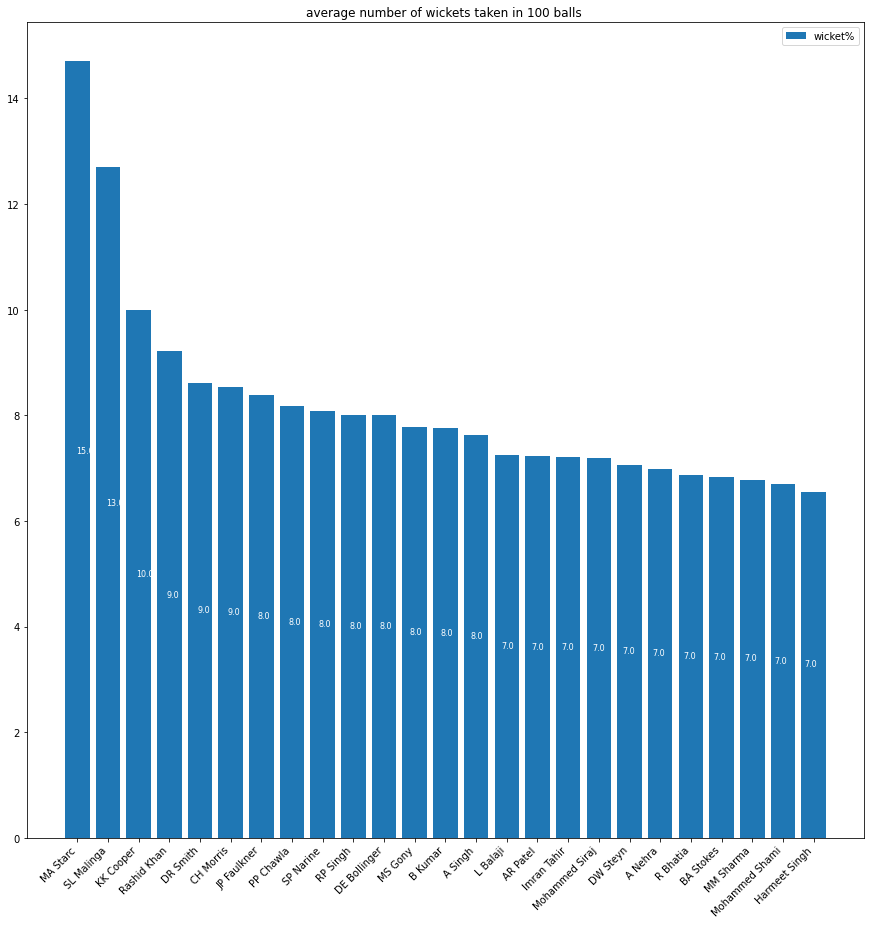

In [20]:
fig1 = plt.figure()
ax1 = plt.axes()
fig1.set_figheight(15)
fig1.set_figwidth(15)
ax1.bar(wicket_bowler.index, wicket_bowler['wicket%'], width = 0.8, label = 'wicket%')
ax1.set_title('average number of wickets taken in 100 balls ')
ax1.legend()
plt.xticks(rotation = 45, ha = 'right')
annotate_stacked_bars(ax1, pad=0.99, colour="white", textsize=8)

# The above chart indicates the top 25 bowler who have highest number of wickets per 100 balls thrown. These players can be very useful during power play hour to shake the confidence of batting team.

In [21]:
# A table indicating runs given away by bowler and number of balls thrown by each player
total_runs = df_del.groupby('bowler').total_runs.sum()
total_runs = pd.DataFrame(total_runs)
total_balls = df_del.groupby(['bowler']).match_id.count()
total_balls = pd.DataFrame(total_balls)
Eco_Run = total_runs.join(total_balls)
Eco_Run.rename(columns = {'match_id' : 'Total_balls_thrown','total_runs' : 'Total_runs_given'}, inplace = True)
Eco_Run['Total_over'] = Eco_Run['Total_balls_thrown']/6
Eco_Run['Eco_rate'] = (Eco_Run['Total_runs_given']/Eco_Run['Total_over'])
Drop_run = Eco_Run[Eco_Run['Total_balls_thrown'] < 500]
Eco_Run = Eco_Run.drop(Drop_run.index)
Top_bowlers = Eco_Run.sort_values(by= ['Eco_rate','Total_balls_thrown']).head(25)
Top_bowlers



,Total_runs_given,Total_balls_thrown,Total_over,Eco_rate
bowler,,,,
A Kumble,1089,983,163.833333,6.646999
DW Steyn,2454,2207,367.833333,6.671500
M Muralitharan,1765,1581,263.500000,6.698292
R Ashwin,3391,3016,502.666667,6.746021
SP Narine,2939,2600,433.333333,6.782308
Rashid Khan,1257,1106,184.333333,6.819168
DL Vettori,894,785,130.833333,6.833121
J Botha,818,709,118.166667,6.922426
Harbhajan Singh,4050,3451,575.166667,7.041437


In [22]:
def annotate_stacked_bars(ax, pad=0.99, colour="yellow", textsize=10):
    """
        Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),2))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

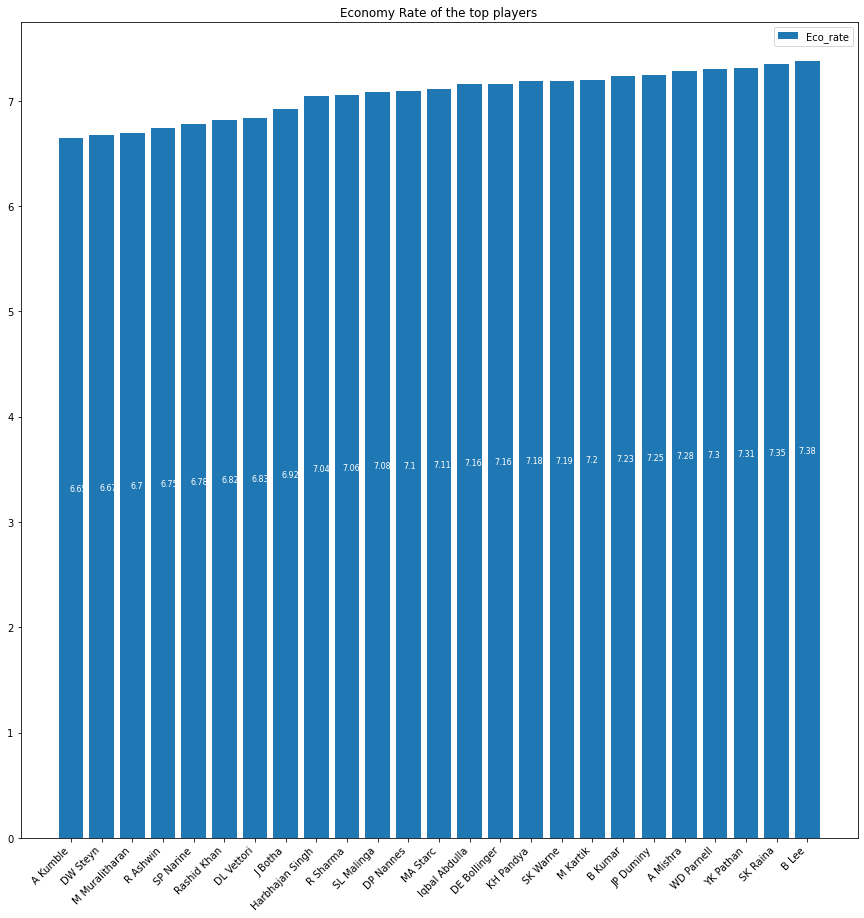

In [23]:
fig1 = plt.figure()
ax1 = plt.axes()
fig1.set_figheight(15)
fig1.set_figwidth(15)
ax1.bar(Top_bowlers.index, Top_bowlers['Eco_rate'], width = 0.8, label = 'Eco_rate')
ax1.set_title('Economy Rate of the top players')
ax1.legend()
plt.xticks(rotation = 45, ha = 'right')
annotate_stacked_bars(ax1, pad=0.99, colour="white", textsize=8)

# The above are top 25 bowlers who will not let runs slip away. They can be very helpful to make sure the other team score less run.

**All rounders help in maintaing the balance in a team.**

The reason for that is all-rounder always gives you an extra bowling or batting option along with specialised players. For example, if a bowler is having a bad day, a good all-rounder can come in and chip in a few extra overs from his quota. In the same way, a good all-rounder can come up the order and hit some quick runs to change the momentum of the game. 

In [24]:
# Find the all rounders
player_score = Top_players.join(Top_bowlers)
player_score['player_score'] = 0.5*(player_score['Strike_rate'] + player_score['Eco_rate'])
player_score.sort_values(by = 'player_score').dropna()

,total_runs,Total_balls,Strike_rate,Total_runs_given,Total_balls_thrown,Total_over,Eco_rate,player_score
batsman,,,,,,,,
SK Raina,5651,4044,139.737883,1139.0,930.0,155.000000,7.348387,73.543135
Harbhajan Singh,896,632,141.772152,4050.0,3451.0,575.166667,7.041437,74.406795
YK Pathan,3404,2334,145.844045,1443.0,1184.0,197.333333,7.312500,76.578272
KH Pandya,960,635,151.181102,1159.0,968.0,161.333333,7.183884,79.182493


# The above players are the all rounders who are good at bowling as well as batting.

 A company can approach any player from the three table depending on the kind of product they want to endorse.
If a company wants to endorse energy drink it will be more fruitful to choose a top batsman. 
Top players generally have a larger fan following they can choose the players with more fans.

**Version 2 ideas** : 
1. Is win/loss of a match effected by factors such as who has won the toss.
2. Who are the player that can play for long time. Generally players with high strike rate gets dissmissed early.


## Any suggestions on the analysis are very welcomed. Thankyou. :)